# **1. Reading Data**

The first step in building a machine learning model is to know the data to work with and while python's *scikit- learn* library is good for using simulated data, python;s *pandas* is more convenient for working with external data (Albon 2018, p. 23). In the next two codeblock, we have used the read_csv method of pandas to load the train and test data (Albon 2018, p. 28).


In [ ]:
import pandas as pd

from google.colab import drive

# Loading data
drive.mount('/content/drive')
url = '/content/drive/MyDrive/Colab Notebooks/SQUAD_DataThon/train.csv'

train_data = pd.read_csv(url,low_memory=False)
train_data = train_data.sample(n=50000, random_state=42)
# View first two rows
train_data.head(2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,Y
204970,150226,30750.0,b,19.52,d,f,b,95000.0,c,Jun-2014,...,33.35,16.0,0.0,20351.0,61.9,28.0,b,a,2.0,1
141394,49872,10000.0,b,10.99,a,e,b,90000.0,b,Feb-2015,...,8.46,11.0,2.0,9233.0,35.6,24.0,b,a,3.0,0


In [ ]:
url2 = '/content/drive/MyDrive/Colab Notebooks/SQUAD_DataThon/test.csv'

test_data = pd.read_csv(url2)
# View first two rows
test_data.head(2)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,335599,25000.0,a,5.32,b,a,b,90000.0,a,Apr-2016,g,22.04,19.0,0.0,39831.0,13.0,40.0,a,a,2.0
1,234182,14000.0,a,13.11,a,a,a,85500.0,a,Mar-2013,b,15.64,7.0,0.0,13515.0,65.0,21.0,b,a,0.0


# **2. Cleaning Data**
Cleaning the data, in *machine learning terms* is called *data wrangling* which is defined as 'the process of
transforming raw data to a clean and organized format ready for use' (Albon 2018, p. 33)

In [ ]:
# Checking the number of rows and columns in the data (Albon 2018, p. 36)
train_data.shape


(50000, 21)

There are 316824 rows and 21 columns in the data

In [ ]:
# We can get descriptive statistics for any numeric columns using describe (Albon 2018, p. 36)

train_data.describe()


,ID,X1,X3,X7,X11,X12,X13,X14,X15,X16,X19,Y
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,5.000000e+04,49954.000000,50000.000000,45336.000000,50000.000000
mean,197431.944180,14116.512000,13.624687,7.455326e+04,17.342625,11.321840,0.179280,1.573773e+04,53.476350,25.460200,1.825349,0.195420
std,114370.097856,8350.803856,4.459156,7.741681e+04,10.845814,5.137897,0.506265,2.037727e+04,24.350445,11.974759,2.170077,0.396528
min,16.000000,500.000000,5.320000,6.000000e+02,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,98198.750000,8000.000000,10.490000,4.500000e+04,11.250000,8.000000,0.000000,6.004000e+03,35.500000,17.000000,0.000000,0.000000
50%,197500.000000,12000.000000,13.330000,6.400000e+04,16.860000,10.000000,0.000000,1.118800e+04,54.400000,24.000000,1.000000,0.000000
75%,296205.250000,20000.000000,16.490000,9.000000e+04,22.920000,14.000000,0.000000,1.951000e+04,72.500000,32.000000,3.000000,0.000000
max,396004.000000,40000.000000,30.990000,8.706582e+06,1622.000000,76.000000,12.000000,1.023940e+06,111.100000,111.000000,32.000000,1.000000


In [ ]:
# Seeing the first 5 rows
train_data.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,Y
204970,150226,30750.0,b,19.52,d,f,b,95000.0,c,Jun-2014,...,33.35,16.0,0.0,20351.0,61.9,28.0,b,a,2.0,1
141394,49872,10000.0,b,10.99,a,e,b,90000.0,b,Feb-2015,...,8.46,11.0,2.0,9233.0,35.6,24.0,b,a,3.0,0
314151,388633,12000.0,a,12.49,a,c,b,50000.0,b,Mar-2014,...,12.09,11.0,0.0,3699.0,56.0,22.0,b,a,2.0,1
36950,340886,24650.0,b,24.50,f,l,a,68604.0,c,Sep-2014,...,23.96,15.0,0.0,23634.0,71.6,24.0,b,a,0.0,1
250975,338787,6600.0,a,6.62,b,d,a,66000.0,a,Oct-2012,...,21.84,18.0,0.0,27792.0,30.3,23.0,b,a,0.0,1


In [ ]:
# Seeing the last 5 rows
train_data.tail()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,Y
267027,81252,6350.0,a,10.64,a,a,b,62000.0,a,Dec-2015,...,33.64,12.0,0.0,147702.0,43.0,21.0,a,a,1.0,0
109849,89590,4750.0,a,10.00,a,k,c,24600.0,b,Mar-2011,...,24.78,8.0,0.0,10766.0,77.5,15.0,b,a,NaN,0
247892,313389,12000.0,a,15.22,c,a,b,40000.0,a,Sep-2013,...,4.41,5.0,0.0,4902.0,48.5,8.0,a,a,1.0,0
264535,296930,7900.0,a,15.81,c,c,a,25000.0,b,Jun-2012,...,8.30,16.0,0.0,6262.0,29.1,20.0,b,a,0.0,1
114593,382944,2000.0,a,19.72,e,a,b,26000.0,c,Jan-2013,...,22.48,9.0,0.0,8758.0,90.3,16.0,a,a,1.0,0


Looking at the data, it can be seen that some values are empty, (NaN),
We will have to get rid of those (Albon 2018, p. 45). The simplest solution here is to drop the rows having missing values (Albon 2018, pp. 76-77). Alternatively, we could have experimented with other strategies to handle missing values like imputing them with some substitute value or a mean value, but we chose to use the simpler strategy here (Albon 2018, p. 79).

In [ ]:
train_data.dropna() # dropping rows with missing values (Albon 2018, pp. 76)


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,Y
204970,150226,30750.0,b,19.52,d,f,b,95000.0,c,Jun-2014,...,33.35,16.0,0.0,20351.0,61.9,28.0,b,a,2.0,1
141394,49872,10000.0,b,10.99,a,e,b,90000.0,b,Feb-2015,...,8.46,11.0,2.0,9233.0,35.6,24.0,b,a,3.0,0
314151,388633,12000.0,a,12.49,a,c,b,50000.0,b,Mar-2014,...,12.09,11.0,0.0,3699.0,56.0,22.0,b,a,2.0,1
36950,340886,24650.0,b,24.50,f,l,a,68604.0,c,Sep-2014,...,23.96,15.0,0.0,23634.0,71.6,24.0,b,a,0.0,1
250975,338787,6600.0,a,6.62,b,d,a,66000.0,a,Oct-2012,...,21.84,18.0,0.0,27792.0,30.3,23.0,b,a,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129940,344691,7000.0,a,14.64,c,a,b,135000.0,b,Feb-2014,...,9.58,13.0,0.0,2867.0,41.6,48.0,a,a,4.0,0
267027,81252,6350.0,a,10.64,a,a,b,62000.0,a,Dec-2015,...,33.64,12.0,0.0,147702.0,43.0,21.0,a,a,1.0,0
247892,313389,12000.0,a,15.22,c,a,b,40000.0,a,Sep-2013,...,4.41,5.0,0.0,4902.0,48.5,8.0,a,a,1.0,0
264535,296930,7900.0,a,15.81,c,c,a,25000.0,b,Jun-2012,...,8.30,16.0,0.0,6262.0,29.1,20.0,b,a,0.0,1


In [ ]:
train_data.isnull()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,Y
204970,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141394,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
314151,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36950,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
250975,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
109849,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
247892,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264535,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Select first row (Albon 2018, p. 37)
train_data.iloc[0]


,204970
ID,150226
X1,30750.0
X2,b
X3,19.52
X4,d
X5,f
X6,b
X7,95000.0
X8,c
X9,Jun-2014


In [ ]:
#Finding the numerical and categorical features
categorical_cols = train_data.select_dtypes(include='object').columns.tolist()
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['X2', 'X4', 'X5', 'X6', 'X8', 'X9', 'X10', 'X17', 'X18']
Numerical Columns: ['ID', 'X1', 'X3', 'X7', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X19', 'Y']


The categorical features are : ['X2', 'X4', 'X5', 'X6', 'X8', 'X9', 'X10', 'X17', 'X18'] AND
The numerical features are :  ['ID', 'X1', 'X3', 'X7', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X19', 'Y']


Bar charts are used to represent the categorical coluimns and histograms are used to represent the numerical ones (Hunt 2019; Muller \& Guido 2016)

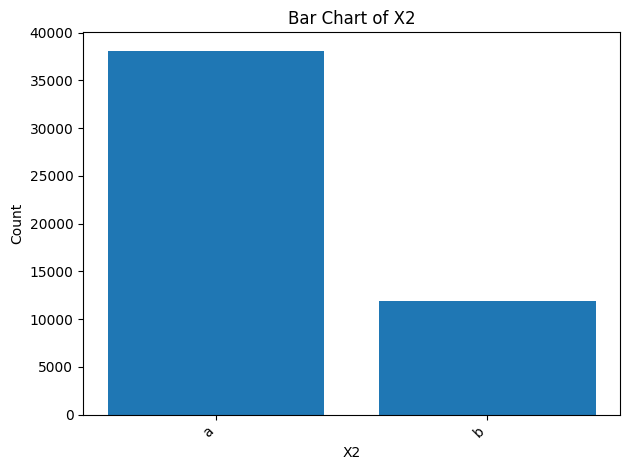

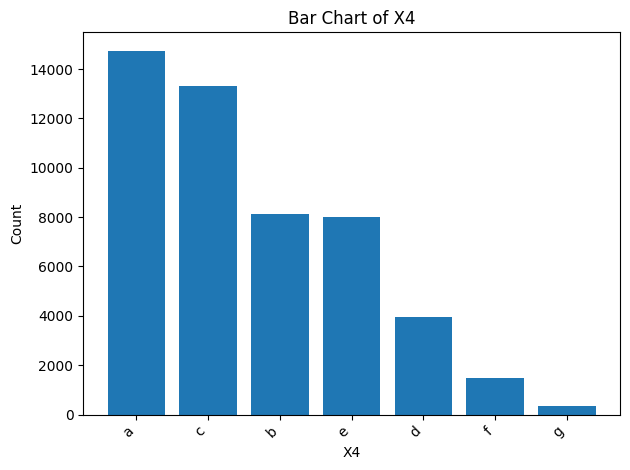

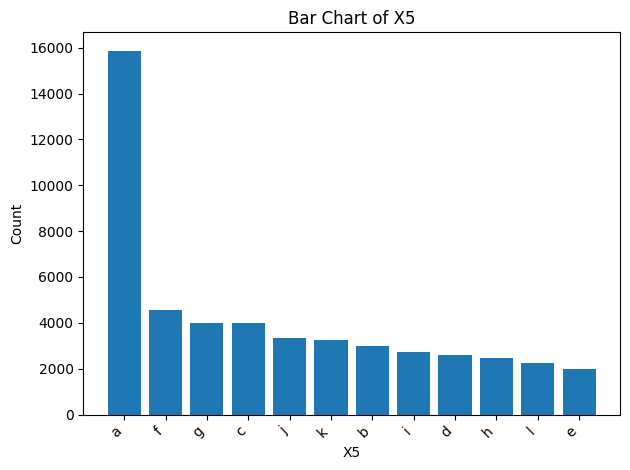

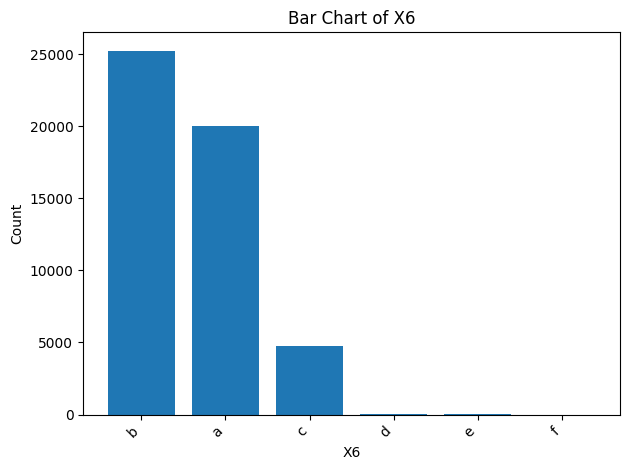

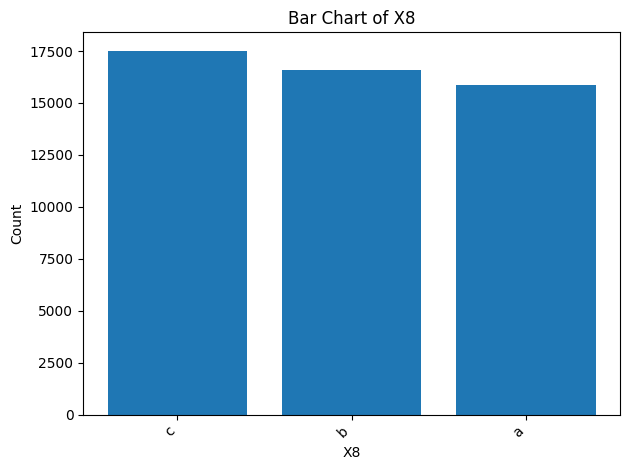

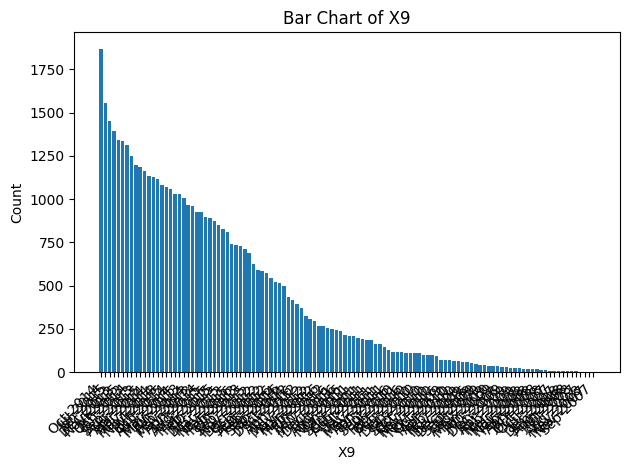

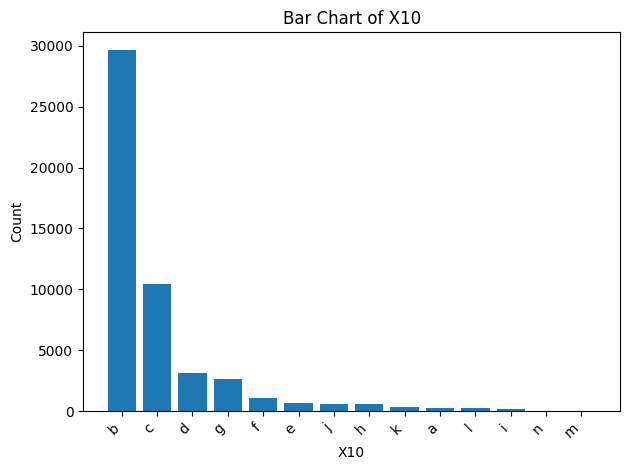

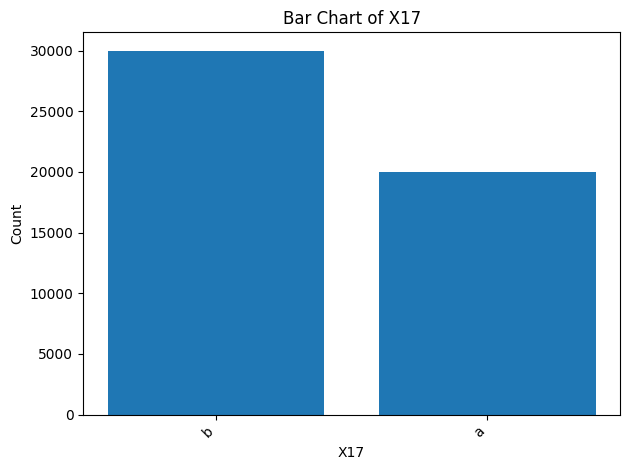

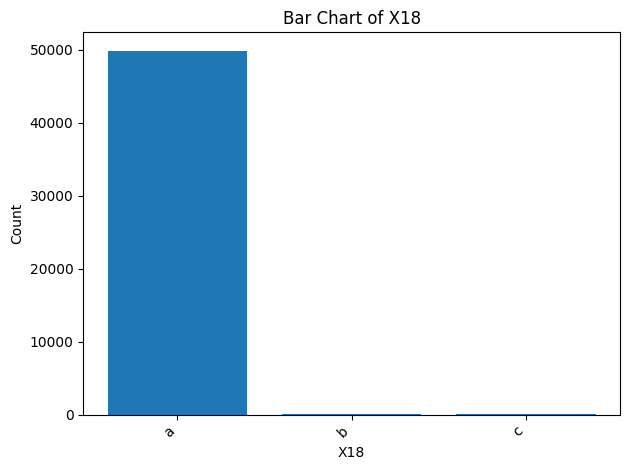

In [ ]:
# Bar charts for categorical columns (Hunt 2019, pp. 54-55)

import matplotlib.pyplot as  pyplot

# Identify categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns

# Create bar charts for categorical features
for feature in categorical_features:
    counts = train_data[feature].value_counts()
    labels = counts.index.tolist()
    sizes = counts.values.tolist()
    index = list(range(1, len(labels) + 1))  # x-axis positions

    # Plot bar chart
    pyplot.figure()
    pyplot.bar(index, sizes, tick_label=labels)
    pyplot.ylabel('Count')
    pyplot.xlabel(feature)
    pyplot.title(f'Bar Chart of {feature}')
    pyplot.xticks(rotation=45, ha='right')
    pyplot.tight_layout()
    pyplot.show()

In [ ]:

train_data_dummies = train_data

In [ ]:
test_data_dummies = test_data

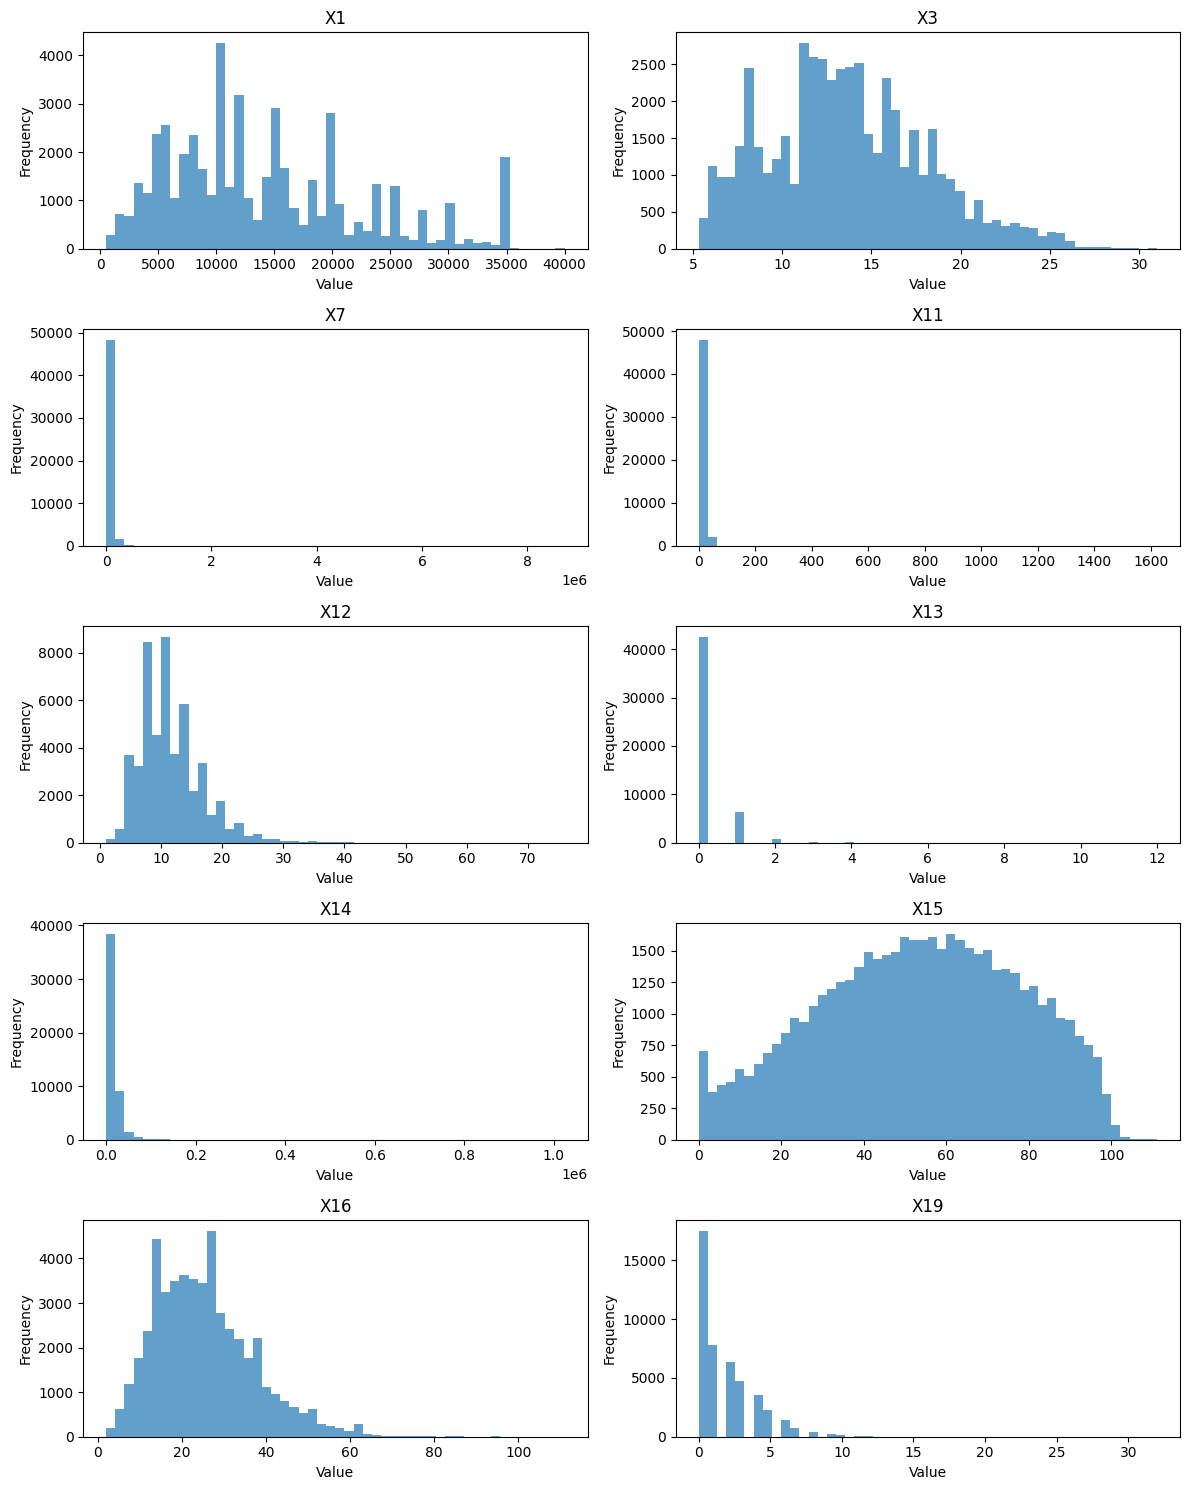

In [ ]:
# Histogram for numerical columns (Muller & Guido 2016, pp. 142-143)

import numpy as np
numerical_features = train_data_dummies.select_dtypes(include=[np.number]).columns.drop(['ID', 'Y'])

# Set up the subplots
n_features = len(numerical_features)
n_rows = (n_features + 1) // 2  # Calculate rows needed for 2 columns
fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 3))
axes = axes.ravel()  # Flatten the axes array for easy iteration

# Plot histograms
for i, feature in enumerate(numerical_features):
    data = train_data_dummies[feature].dropna()
    axes[i].hist(data, bins=50, alpha=0.7)
    axes[i].set_title(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel("Value")

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
plt.show()

Getting rid of the skewed columns X7. X11, X13, X14

In [ ]:
train_data_dummies = train_data_dummies.drop(columns= ['X7', 'X11','X13' , 'X14'] )

#  Display the updated columns
print(train_data_dummies.columns)

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X9', 'X10', 'X12',
       'X15', 'X16', 'X17', 'X18', 'X19', 'Y'],
      dtype='object')


In [ ]:
test_data_dummies = test_data_dummies.drop(columns= ['X7', 'X11','X13' , 'X14'] )

In [ ]:
X_train = train_data_dummies.drop(columns='Y')
y_train = train_data_dummies['Y']
X_test = test_data_dummies

In [ ]:
X_test.head()

,ID,X1,X2,X3,X4,X5,X6,X8,X9,X10,X12,X15,X16,X17,X18,X19
0,335599,25000.0,a,5.32,b,a,b,a,Apr-2016,g,19.0,13.0,40.0,a,a,2.0
1,234182,14000.0,a,13.11,a,a,a,a,Mar-2013,b,7.0,65.0,21.0,b,a,0.0
2,335286,7000.0,a,8.39,a,a,b,a,Apr-2016,g,4.0,10.5,12.0,b,a,5.0
3,172447,2500.0,a,15.61,c,l,a,c,Nov-2013,c,6.0,52.2,9.0,b,a,0.0
4,345387,3500.0,a,13.33,c,g,b,b,Aug-2015,f,14.0,91.8,28.0,a,a,4.0


In [ ]:
X_train.head()

,ID,X1,X2,X3,X4,X5,X6,X8,X9,X10,X12,X15,X16,X17,X18,X19
204970,150226,30750.0,b,19.52,d,f,b,c,Jun-2014,b,16.0,61.9,28.0,b,a,2.0
141394,49872,10000.0,b,10.99,a,e,b,b,Feb-2015,b,11.0,35.6,24.0,b,a,3.0
314151,388633,12000.0,a,12.49,a,c,b,b,Mar-2014,b,11.0,56.0,22.0,b,a,2.0
36950,340886,24650.0,b,24.50,f,l,a,c,Sep-2014,b,15.0,71.6,24.0,b,a,0.0
250975,338787,6600.0,a,6.62,b,d,a,a,Oct-2012,b,18.0,30.3,23.0,b,a,0.0


In [ ]:
X_train.shape

(50000, 16)

In [ ]:
X_test.shape


(71606, 16)

The data looks highly imbalaned (more 0's than 1), with class 0 being the *majority* and class 1 as the *minority*. So we use *upsampling* of minority class and *downsampling* of majority class to handle class imbalance (Albon 2018, pp. 90 - 93)

In [ ]:
# Option 1: Handle imbalance by Downsampling majority class
def downsample(X, y):
    class0_idx = np.where(y == 0)[0]
    class1_idx = np.where(y == 1)[0]
    n_class1 = len(class1_idx)
    class0_downsampled = np.random.choice(class0_idx, size=n_class1, replace=False)

    idx_downsampled = np.hstack((class0_downsampled, class1_idx))
    np.random.shuffle(idx_downsampled)
    return X.iloc[idx_downsampled], y.iloc[idx_downsampled]

# Option 2: Handle imbalance by Upsampling minority class
def upsample(X, y):
    class0_idx = np.where(y == 0)[0]
    class1_idx = np.where(y == 1)[0]
    n_class0 = len(class0_idx)
    class1_upsampled = np.random.choice(class1_idx, size=n_class0, replace=True)

    idx_upsampled = np.hstack((class0_idx, class1_upsampled))
    np.random.shuffle(idx_upsampled)
    return X.iloc[idx_upsampled], y.iloc[idx_upsampled]

In [ ]:
X_train_fin, y_train_fin = downsample(X_train, y_train)

# 3.  **Modeling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode all object (categorical) columns
for col in X_train_fin.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train_fin[col] = le.fit_transform(X_train_fin[col].astype(str))
    test_data_dummies[col] = test_data_dummies[col].astype(str)
    test_data_dummies[col] = le.transform(test_data_dummies[col].where(test_data_dummies[col].isin(le.classes_), le.classes_[0]))


<ipython-input-137-464f2f0a2945>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fin[col] = le.fit_transform(X_train_fin[col].astype(str))
<ipython-input-137-464f2f0a2945>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fin[col] = le.fit_transform(X_train_fin[col].astype(str))
<ipython-input-137-464f2f0a2945>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_fin, y_train_fin)

test_predictions = rf.predict(X_test)
test_ids = test_data_dummies['ID']

In [ ]:

submission_df.to_csv("submission.csv", index=False)


import os
print("Files in current directory:", os.listdir('.'))

Files in current directory: ['.config', 'drive', 'submission.csv', 'sample_data']


Matplotlib is a graph plotting library for Python. For simple graphs Matplotlib is
very easy to use (Hunt 2019, p. 35)


# **References**


Albon, C 2018, *Machine Learning with Python CookBook*, O'Reilly, Media, Inc.,The USA, viewed 30 April 2025, URL: https://onedrive.live.com/?redeem=aHR0cHM6Ly8xZHJ2Lm1zL2YvYy9jZDBjODk5OTI5MmM5ZTA5L0V2Y0Z6Ykg1cUI1RG1hNUZ5aUh2aU1nQkY2eTV2QzVRemd2Zm1lbXkxUDVCeUE&cid=CD0C8999292C9E09&sb=name&sd=1&id=CD0C8999292C9E09%211274&parId=CD0C8999292C9E09%211207&o=OneUp





Hunt, J 2019, 'Advanced Guide to Python 3 Programming', in I Mackie, S Abramsky, C Hankin, DC Kozen, A Pitts, HR Nielson, SS Skiena, I Stewart \& M Hinchey (eds), *Undergraduate Topics in Computer Science*, Springer, Switzerland, pp. 1 - 497, DOI: https://doi.org/10.1007/978-3-030-25943-3


Müller, AC \& Guido, S 2016, *Introduction to Machine Learning with Python*, O'reilly, The USA, viewed 30 April 2025, URL: https://onedrive.live.com/?redeem=aHR0cHM6Ly8xZHJ2Lm1zL2YvYy9jZDBjODk5OTI5MmM5ZTA5L0V2Y0Z6Ykg1cUI1RG1hNUZ5aUh2aU1nQkY2eTV2QzVRemd2Zm1lbXkxUDVCeUE&cid=CD0C8999292C9E09&sb=name&sd=1&id=CD0C8999292C9E09%211261&parId=CD0C8999292C9E09%211207&o=OneUp
